In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
f=open('/content/drive/MyDrive/한이음2023/data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


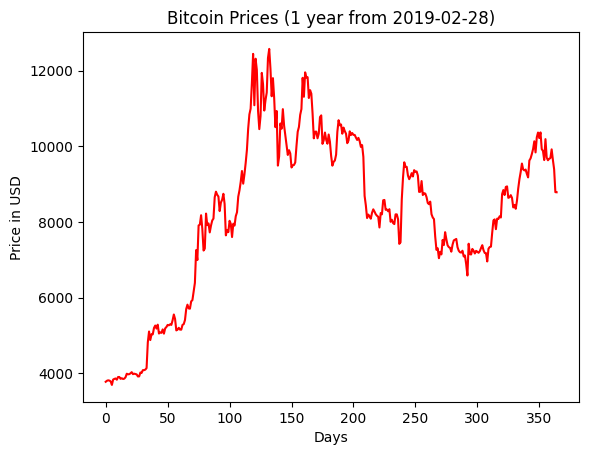

In [4]:
# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [5]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수


1.   X[0] Day 1 2 3 4 5 6 7 // Y[0] Day 8
2.   X[1] Day 2 3 4 5 6 7 8 // Y[1] Day 9
....

In [6]:
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [8]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# 추가로 공부하기 ....
*   root mean square err : sqrt[sigma(y_test-y_pred)^2]
*   mean absolute err : |y_test|-|y_pred|




In [9]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=50,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
250/250 - 2s - loss: 1538.6578 - mae: 1538.6578 - val_loss: 321.3020 - val_mae: 321.3020 - 2s/epoch - 10ms/step
Epoch 2/50
250/250 - 1s - loss: 534.3282 - mae: 534.3282 - val_loss: 360.0770 - val_mae: 360.0770 - 995ms/epoch - 4ms/step
Epoch 3/50
250/250 - 1s - loss: 489.2183 - mae: 489.2183 - val_loss: 348.8407 - val_mae: 348.8407 - 985ms/epoch - 4ms/step
Epoch 4/50
250/250 - 1s - loss: 495.6148 - mae: 495.6148 - val_loss: 323.9467 - val_mae: 323.9467 - 1s/epoch - 4ms/step
Epoch 5/50
250/250 - 1s - loss: 522.8644 - mae: 522.8644 - val_loss: 346.2352 - val_mae: 346.2352 - 1s/epoch - 4ms/step
Epoch 6/50
250/250 - 1s - loss: 515.7542 - mae: 515.7542 - val_loss: 348.0717 - val_mae: 348.0717 - 1s/epoch - 5ms/step
Epoch 7/50
250/250 - 2s - loss: 478.8954 - mae: 478.8954 - val_loss: 380.0597 - val_mae: 380.0597 - 2s/epoch - 7ms/step
Epoch 8/50
250/250 - 1s - loss: 505.1720 - mae: 505.1720 - val_loss: 558.2936 - val_mae: 558.2936 - 1s/epoch - 4ms/step
Epoch 9/50
250/250 - 1s - loss:

In [10]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

손실 함수: 365.8992919921875 MAE: 365.8992919921875


In [11]:
# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))
# 백분율로 변경 후 비교

4/4 [==============================] - 0s 5ms/step
평균절댓값백분율오차(MAPE): [0.04355292]


In [12]:
print(pred)

[[8545.855 ]
 [8495.947 ]
 [8430.766 ]
 [8397.227 ]
 [8310.047 ]
 [8235.395 ]
 [8206.217 ]
 [8088.359 ]
 [7976.939 ]
 [7855.6733]
 [7644.271 ]
 [7372.7046]
 [7178.7715]
 [6992.3735]
 [6976.054 ]
 [6909.5835]
 [7047.5103]
 [7066.4575]
 [7181.731 ]
 [7213.563 ]
 [7149.6055]
 [7117.6064]
 [7081.595 ]
 [7025.821 ]
 [7063.067 ]
 [7117.436 ]
 [7167.186 ]
 [7190.4897]
 [7129.5303]
 [7058.786 ]
 [6996.4937]
 [6962.5024]
 [6962.09  ]
 [6906.8057]
 [6872.142 ]
 [6761.2144]
 [6595.035 ]
 [6774.1426]
 [6811.4385]
 [6821.7046]
 [6883.2056]
 [6909.812 ]
 [6906.07  ]
 [6938.8516]
 [6932.8896]
 [6926.2046]
 [6936.716 ]
 [6973.0503]
 [7023.393 ]
 [7000.6406]
 [6951.53  ]
 [6930.4644]
 [6834.816 ]
 [6902.272 ]
 [6950.061 ]
 [6999.76  ]
 [7148.9575]
 [7376.979 ]
 [7512.6465]
 [7493.9863]
 [7588.3413]
 [7679.4326]
 [7754.2563]
 [7778.5527]
 [8008.8086]
 [8216.717 ]
 [8252.943 ]
 [8356.809 ]
 [8461.081 ]
 [8406.492 ]
 [8377.668 ]
 [8360.332 ]
 [8349.4795]
 [8247.164 ]
 [8184.0005]
 [8096.852 ]
 [8162.6465]

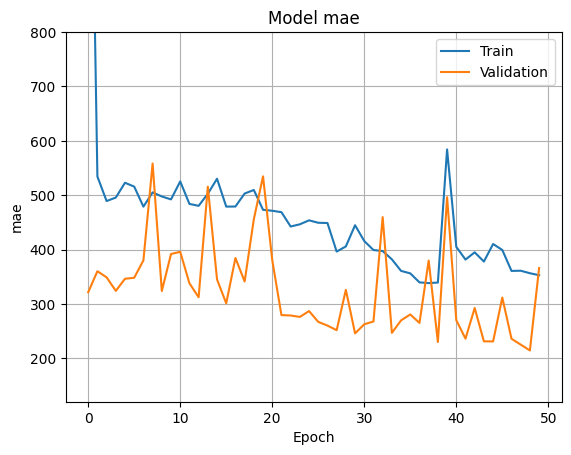

In [13]:
# 학습 곡선
plt.plot(hist.history['mae']) # MAE 작을수록 좋음
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

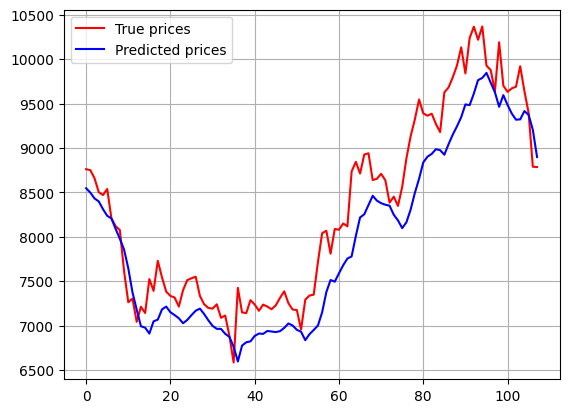

In [14]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 경향성을 맞추는 것이 좋은 것.

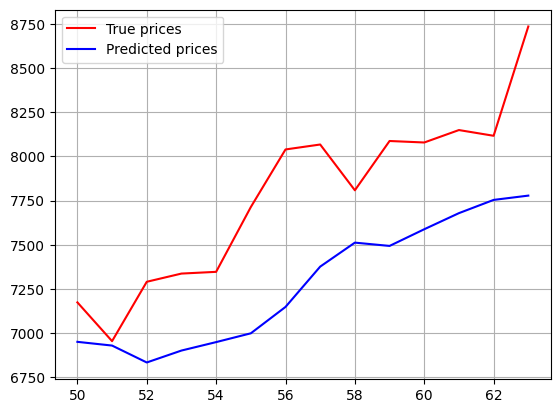

In [15]:
# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

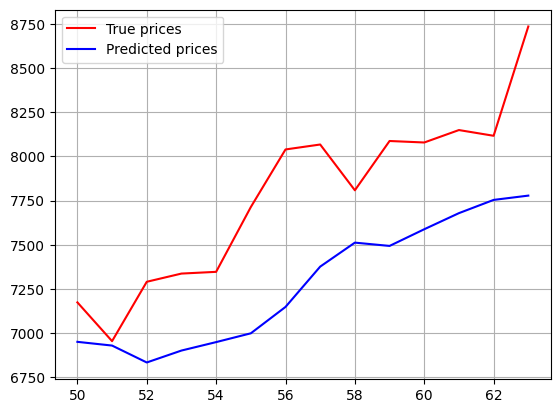

In [16]:
# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

##다중채널

In [17]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("/content/drive/MyDrive/한이음2023/data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() 
# 종가, 시가, 고가, 저가를 모두 취함 (다중 채널)

In [18]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

In [19]:
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])
#[3772.93633533 3796.63728431 3824.16587937 3666.52401643] 이렇게가 하나의 데이터 (종가,시가,고가,저가) 모두 따지기 때문

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [21]:
# LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
#Dense 4 왜냐하면 다중채널이기 때문.
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=50,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
250/250 - 2s - loss: 1748.8508 - mae: 1748.8508 - val_loss: 337.6267 - val_mae: 337.6267 - 2s/epoch - 8ms/step
Epoch 2/50
250/250 - 1s - loss: 475.3390 - mae: 475.3390 - val_loss: 561.0556 - val_mae: 561.0556 - 932ms/epoch - 4ms/step
Epoch 3/50
250/250 - 1s - loss: 474.9953 - mae: 474.9953 - val_loss: 307.2318 - val_mae: 307.2318 - 928ms/epoch - 4ms/step
Epoch 4/50
250/250 - 1s - loss: 469.9859 - mae: 469.9859 - val_loss: 389.2785 - val_mae: 389.2785 - 1s/epoch - 5ms/step
Epoch 5/50
250/250 - 1s - loss: 495.0752 - mae: 495.0752 - val_loss: 306.8744 - val_mae: 306.8744 - 1s/epoch - 5ms/step
Epoch 6/50
250/250 - 1s - loss: 485.6201 - mae: 485.6201 - val_loss: 563.5589 - val_mae: 563.5589 - 951ms/epoch - 4ms/step
Epoch 7/50
250/250 - 1s - loss: 487.2368 - mae: 487.2368 - val_loss: 423.6017 - val_mae: 423.6017 - 849ms/epoch - 3ms/step
Epoch 8/50
250/250 - 1s - loss: 443.7031 - mae: 443.7031 - val_loss: 346.5392 - val_mae: 346.5392 - 855ms/epoch - 3ms/step
Epoch 9/50
250/250 - 1s

In [22]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])


손실 함수: 142.01158142089844 MAE: 142.01158142089844


In [23]:
# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

4/4 [==============================] - 0s 5ms/step
LSTM 평균절댓값백분율오차(MAPE): [0.02380941 0.00754327 0.02029818 0.01740707]


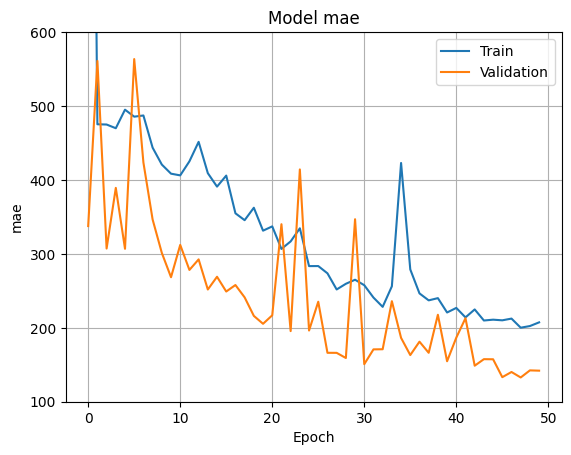

In [24]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()